### Existe concentração de aumentos em algum mês ou período

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv(r'C:\digital college\DA18\PYTHON\Projeto_Unidade_3\_5_Dataframes_tratados\dados_completos.csv')


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12064\1510846424.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  variacao = produto_ano.pct_change() * 100


Maiores picos de aumento:
             data                            prod_und      variacao
18469 2017-05-01                  ABACAXI HAVAÍ (kg)           inf
17798 2017-03-01            TANGERINA PONKAN (22 kg)  2.799000e+05
17799 2017-03-01            TANGERINA PONKAN (25 kg)  2.799000e+05
66108 2022-12-01               LARANJA VALÊNCIA (kg)  1.626082e+05
39527 2019-12-01               LARANJA VALÊNCIA (kg)  1.420296e+05
16391 2017-01-01               LARANJA VALÊNCIA (kg)  1.249000e+05
66304 2022-12-01  RAIZ DE MANDIOCA PARA FARINHA (kg)  1.135080e+05
48104 2020-12-01               LARANJA VALÊNCIA (kg)  9.845000e+04
61093 2022-06-01                  ABACAXI PÉROLA (t)  9.272303e+04
72479 2023-08-01  RAIZ DE MANDIOCA PARA FARINHA (kg)  9.051781e+04


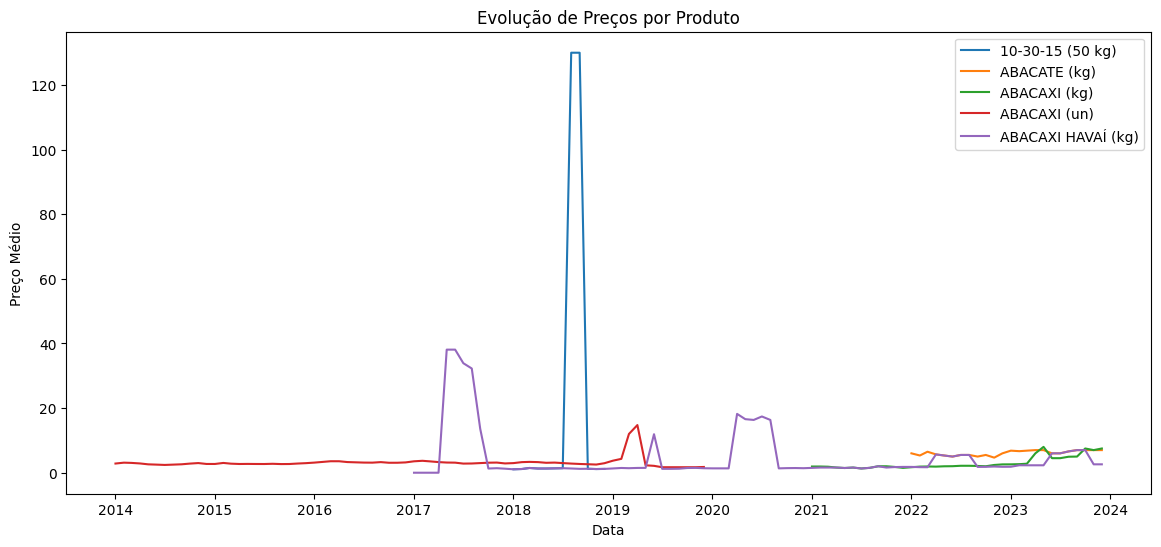

In [ ]:

# Converter a coluna ano_mes para datetime
df['data'] = pd.to_datetime(df['ano_mes'].astype(str), format='%Y%m')

# Agora seu código original pode continuar normalmente
produto_ano = df.groupby(['prod_und', 'data'])['valor'].mean().unstack(level=0)

# Calcular variação mensal
variacao = produto_ano.pct_change() * 100

# Identificar picos
picos = variacao.stack().reset_index()
picos.columns = ['data', 'prod_und', 'variacao']
top_picos = picos.sort_values('variacao', ascending=False).head(10)

print("Maiores picos de aumento:\n", top_picos)

# Visualização
plt.figure(figsize=(14,6))
for produto in produto_ano.columns[:5]:  # Primeiros 5 produtos para exemplo
    plt.plot(produto_ano.index, produto_ano[produto], label=produto)
plt.legend()
plt.title('Evolução de Preços por Produto')
plt.ylabel('Preço Médio')
plt.xlabel('Data')
plt.show()

# Análise por produto/vendedor (se a coluna existir)
if 'vendedor' in df.columns:
    vendedor_produto = df.groupby(['tipo_de_comercializacao', 'prod_und', 'data'])['valor'].sum().unstack(level=[0,1])
    vendedor_produto.plot(subplots=True, layout=(-1, 3), figsize=(15, 20), legend=False)
    plt.tight_layout()
    plt.show()